In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


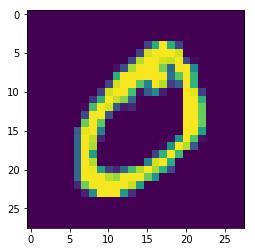

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `C

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 270us/step - loss: 0.5219 - acc: 0.8551 - val_loss: 0.0934 - val_acc: 0.9807
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 12s 195us/step - loss: 0.2470 - acc: 0.9277 - val_loss: 0.0564 - val_acc: 0.9879
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 12s 196us/step - loss: 0.1938 - acc: 0.9434 - val_loss: 0.0433 - val_acc: 0.9905
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 12s 196us/step - loss: 0.1644 - acc: 0.9482 - val_loss: 0.0417 - val_acc: 0.9906
Epoch 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.0218935436445754, 0.9931]


Whatever we have seen above was the basic code from previous assignment.
Now we have to add Image Normalization. But before that let's first check the mean value and standard deviation of train and test dataset.

In [0]:
# importing ImageDataGenerator class so that we can add image normalization to 
from keras.preprocessing.image import ImageDataGenerator

In [11]:
print("Mean value of train dataset is {}".format(X_train.mean()))
print("Standard Deviation of train dataset is {}".format(X_train.std()))
print("Mean value of test dataset is {}".format(X_test.mean()))
print("Standard Deviation of test dataset is {}".format(X_test.std()))

Mean value of train dataset is 0.13066062331199646
Standard Deviation of train dataset is 0.30810776352882385
Mean value of test dataset is 0.13251467049121857
Standard Deviation of test dataset is 0.3104802668094635


#### Now we will add image normalization to the train and test images

In [0]:
# create generator that centers pixel values i.e image normalization
train_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [0]:
# fitting the train and test data with the specified normalization normalization
train_datagen.fit(X_train)
test_datagen.fit(X_test)

In [14]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 10)       

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(train_datagen.flow(X_train, Y_train, batch_size=128), epochs=10, verbose=1, validation_data=test_datagen.flow(X_test, Y_test, batch_size=128), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 16s 34ms/step - loss: 0.5333 - acc: 0.8533 - val_loss: 0.0938 - val_acc: 0.9805
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 14s 29ms/step - loss: 0.2501 - acc: 0.9264 - val_loss: 0.0655 - val_acc: 0.9875
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 14s 29ms/step - loss: 0.2006 - acc: 0.9400 - val_loss: 0.0495 - val_acc: 0.9893
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================] - 13s 29ms/step - loss: 0.1699 - acc: 0.9462 - val_loss: 0.0408 - val_acc: 0.9898
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
469/469 [==============================] - 13s 28ms/step - loss: 0.1492 - acc: 0.9500

In [0]:
score = model.evaluate(test_datagen.flow(X_test, Y_test, batch_size=128), verbose=0)
print(score)

[0.025816280198656023, 0.9931]


#### After image normalization the next step is to add l2 regularization. So applying L2 regularization to all the cnn layers

In [0]:
# importing keras regularizier
from keras.regularizers import l2

In [16]:
# Defining the model architecture again along with l2 regularization
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=l2(0.0005), input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu', kernel_regularizer=l2(0.0005))) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu', kernel_regularizer=l2(0.0005))) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=l2(0.0005)))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=l2(0.0005)))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=l2(0.0005)))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=l2(0.0005)))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4, kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update you

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), kernel_regularizer=<keras.reg...)`


In [17]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(train_datagen.flow(X_train, Y_train, batch_size=128), epochs=10, verbose=1, validation_data=test_datagen.flow(X_test, Y_test, batch_size=128), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 18s 39ms/step - loss: 0.5558 - acc: 0.8606 - val_loss: 0.2195 - val_acc: 0.9686
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 14s 30ms/step - loss: 0.2950 - acc: 0.9274 - val_loss: 0.1119 - val_acc: 0.9878
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 14s 29ms/step - loss: 0.2337 - acc: 0.9419 - val_loss: 0.1031 - val_acc: 0.9857
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================] - 13s 28ms/step - loss: 0.2056 - acc: 0.9457 - val_loss: 0.0735 - val_acc: 0.9905
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.00

In [18]:
score = model.evaluate(test_datagen.flow(X_test, Y_test, batch_size=128), verbose=0)
print(score)

[0.053661593168973926, 0.9914]


#### Now the next step is to add activation layer after batch normlization and running for 40 epochs

In [0]:
from keras.layers import Activation # activation to be used as a layer
from keras.callbacks import ModelCheckpoint # Library to be used for saving the best checkpoint

In [20]:
# Defining the model architecture again along with l2 regularization
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005), input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=l2(0.0005))) #24
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu', kernel_regularizer=l2(0.0005))) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#9
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#7
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#5
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#3
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4, kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<kera

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)       

In [0]:
# checkpoint for saving the model with highest validation accuracy
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(train_datagen.flow(X_train, Y_train, batch_size=128), epochs=40, verbose=1, validation_data=test_datagen.flow(X_test, Y_test, batch_size=128), callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 16s 34ms/step - loss: 0.5857 - acc: 0.8500 - val_loss: 0.3449 - val_acc: 0.9317

Epoch 00001: val_acc improved from -inf to 0.93170, saving model to weights-improvement-01-0.93.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 13s 28ms/step - loss: 0.2943 - acc: 0.9263 - val_loss: 0.1416 - val_acc: 0.9810

Epoch 00002: val_acc improved from 0.93170 to 0.98100, saving model to weights-improvement-02-0.98.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 13s 28ms/step - loss: 0.2422 - acc: 0.9376 - val_loss: 0.0863 - val_acc: 0.9885

Epoch 00003: val_acc improved from 0.98100 to 0.98850, saving model to weights-improvement-03-0.99.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate

In [0]:
ascore = model.evaluate(test_datagen.flow(X_test, Y_test, batch_size=128), verbose=0)
print(score)

[0.030682271525263788, 0.995]


#### Code to find the misclassified images and visualization of them

In [0]:
# getting the prediction on test data
prediction = model.predict(test_datagen.flow(X_test, shuffle=False))

In [0]:
# getting the class from the prediction
prediction = np.argmax(prediction, axis=1)

In [0]:
# getting the class from the test set like the prediction
Y_test = np.argmax(Y_test, axis=1)

In [31]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [32]:
Y_test

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
# finding the cases for which the prediction is wrong from the ground truth
wrong_indices = [i for i in range(len(prediction)) if prediction[i] != Y_test[i]]

In [34]:
# total number of instances for which the prediction was wrong
len(wrong_indices)

55

In [0]:
import matplotlib.pyplot as plt

In [0]:
images_to_plot = 25


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


<Figure size 432x288 with 0 Axes>

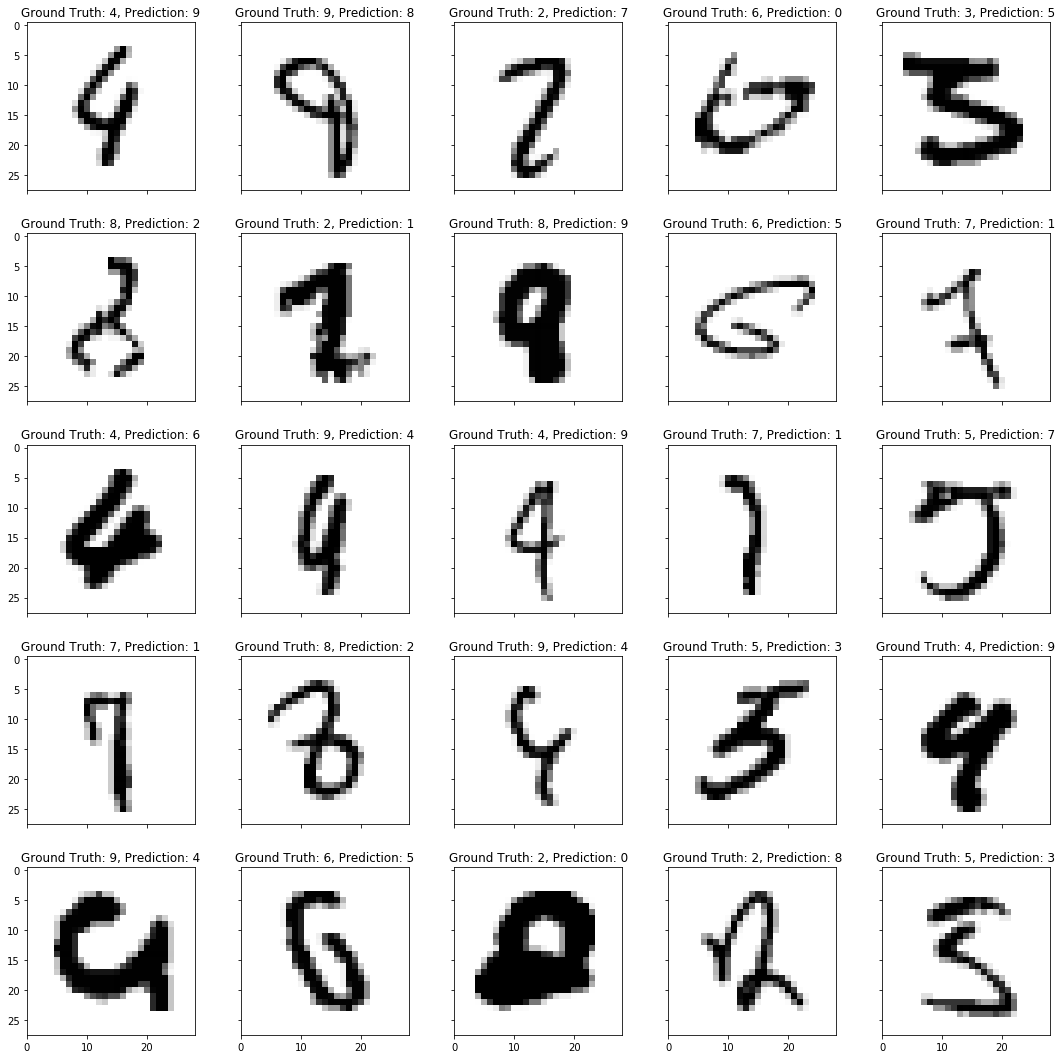

In [45]:
plt.clf()
plt.style.use('seaborn-muted')

fig, axes = plt.subplots(5,5, 
  figsize=(15, 15),
  sharex=True, sharey=True,
  subplot_kw=dict(adjustable='box-forced', aspect='equal'))

for i in range(images_to_plot):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//5
    subplot_col = i%5 
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = X_test[wrong_indices[i]].squeeze()
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_title('Ground Truth: {}, Prediction: {}'.format(Y_test[wrong_indices[i]], prediction[wrong_indices[i]]))
    ax.set_xbound([0,28])
    
plt.tight_layout()
plt.show()
